In [1]:
import os
from skimage.io import imread_collection
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
#import os
#os.chdir('C:\\Users\\Jamy\\Documents\\Temp')
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()
#import tensorflow as tf
#tf.test.gpu_device_name()
!git clone https://github.com/hromi/SMILEsmileD.git

Cloning into 'SMILEsmileD'...
remote: Enumerating objects: 13190, done.
remote: Total 13190 (delta 0), reused 0 (delta 0), pack-reused 13190
Receiving objects: 100% (13190/13190), 37.48 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [0]:
from skimage.color import gray2rgb

negatives = imread_collection('SMILEsmileD/SMILEs/negatives/negatives7/*').concatenate()
positives = imread_collection('SMILEsmileD/SMILEs/positives/positives7/*').concatenate()
rgb_neg = []
rgb_pos = []
for im in negatives:
  rgb_neg.append(gray2rgb(im))
for im in positives:
  rgb_pos.append(gray2rgb(im))

In [0]:
X = np.concatenate([rgb_neg, rgb_pos])
Y = np.concatenate([np.zeros(len(negatives)), np.ones(len(positives))])

In [5]:
X = X.reshape((-1, 64, 64, 3))
print(X[2].shape)

(64, 64, 3)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [7]:
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet import MobileNet
basemodel_vgg = VGG16(include_top=False, input_shape=(64, 64, 3), weights='imagenet')
model_vgg = keras.models.Sequential([
    basemodel_vgg,
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

basemodel_res = ResNet50(include_top=False, input_shape=(64, 64, 3), weights='imagenet')
model_res = keras.models.Sequential([
    basemodel_res,
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

basemodel_mob = MobileNet(include_top=False, input_shape=(64, 64, 3), weights='imagenet')
model_mob = keras.models.Sequential([
    basemodel_mob,
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])





58892288/58889256 [==============================] - 2s 0us/step





/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


17227776/17225924 [==============================] - 1s 0us/step


In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(        
        X_train,
        Y_train,
        batch_size=150)

validation_generator = test_datagen.flow(
        X_test,
        Y_test,
        batch_size=150)

In [9]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
               'balanced',
                np.unique(Y_train), 
                Y_train)

print(class_weights)
print(len(negatives))
print(len(positives))

[0.69852837 1.75926586]
9475
3690


In [10]:
from keras import optimizers

model_vgg.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_res.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_mob.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history_vgg = model_vgg.fit_generator(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      class_weight = class_weights)

Epoch 1/100
66/66 [==============================] - 39s 597ms/step - loss: 0.6053 - acc: 0.7204 - val_loss: 0.3496 - val_acc: 0.8931
Epoch 2/100
66/66 [==============================] - 26s 393ms/step - loss: 0.3457 - acc: 0.8556 - val_loss: 0.2196 - val_acc: 0.9143
Epoch 3/100
66/66 [==============================] - 26s 392ms/step - loss: 0.2743 - acc: 0.8918 - val_loss: 0.2064 - val_acc: 0.9152
Epoch 4/100
66/66 [==============================] - 26s 393ms/step - loss: 0.2458 - acc: 0.9055 - val_loss: 0.1821 - val_acc: 0.9265
Epoch 5/100
66/66 [==============================] - 26s 393ms/step - loss: 0.2254 - acc: 0.9104 - val_loss: 0.1906 - val_acc: 0.9180
Epoch 6/100
66/66 [==============================] - 26s 393ms/step - loss: 0.2273 - acc: 0.9126 - val_loss: 0.1922 - val_acc: 0.9159
Epoch 7/100
66/66 [==============================] - 26s 393ms/step - loss: 0.2079 - acc: 0.9215 - val_loss: 0.1760 - val_acc: 0.9298
Epoch 8/100
66/66 [==============================] - 26s 393ms

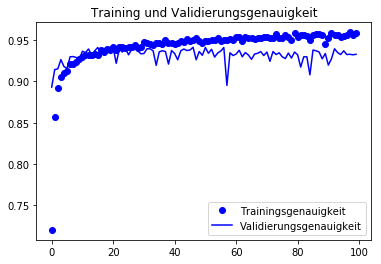

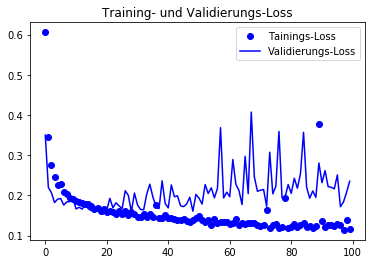

In [0]:
import matplotlib.pyplot as plt
acc = history_vgg.history['acc']
val_acc = history_vgg.history['val_acc']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Training und Validierungsgenauigkeit')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Tainings-Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs-Loss')
plt.title("Training- und Validierungs-Loss")
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, model_vgg.predict_classes(X_train)))
print(confusion_matrix(Y_test, model_vgg.predict_classes(X_test)))

[[6807  297]
 [ 290 2479]]
[[2234  137]
 [ 131  790]]


In [0]:
history_res = model_res.fit_generator(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      class_weight = class_weights)

Epoch 1/100
66/66 [==============================] - 52s 781ms/step - loss: 0.4667 - acc: 0.7850 - val_loss: 0.3402 - val_acc: 0.8569
Epoch 2/100
66/66 [==============================] - 35s 523ms/step - loss: 0.2979 - acc: 0.8790 - val_loss: 0.5649 - val_acc: 0.8785
Epoch 3/100
66/66 [==============================] - 34s 522ms/step - loss: 0.2611 - acc: 0.8998 - val_loss: 0.4381 - val_acc: 0.9222
Epoch 4/100
66/66 [==============================] - 34s 521ms/step - loss: 0.2439 - acc: 0.9072 - val_loss: 0.9543 - val_acc: 0.8919
Epoch 5/100
66/66 [==============================] - 35s 523ms/step - loss: 0.2277 - acc: 0.9131 - val_loss: 1.3363 - val_acc: 0.8791
Epoch 6/100
66/66 [==============================] - 35s 523ms/step - loss: 0.2139 - acc: 0.9211 - val_loss: 1.3937 - val_acc: 0.8809
Epoch 7/100
66/66 [==============================] - 34s 522ms/step - loss: 0.2113 - acc: 0.9184 - val_loss: 1.4621 - val_acc: 0.8882
Epoch 8/100
66/66 [==============================] - 34s 522ms

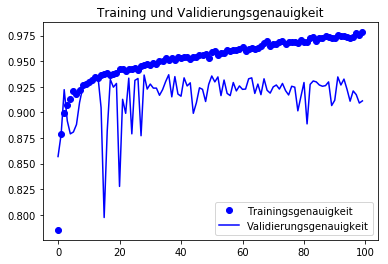

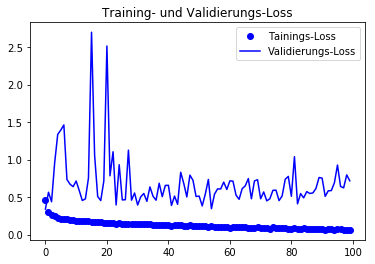

In [0]:
import matplotlib.pyplot as plt
acc = history_res.history['acc']
val_acc = history_res.history['val_acc']
loss = history_res.history['loss']
val_loss = history_res.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Training und Validierungsgenauigkeit')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Tainings-Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs-Loss')
plt.title("Training- und Validierungs-Loss")
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, model_res.predict_classes(X_train)))
print(confusion_matrix(Y_test, model_res.predict_classes(X_test)))

[[7104    0]
 [2769    0]]
[[2371    0]
 [ 921    0]]


In [0]:
history_mob = model_mob.fit_generator(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      class_weight = class_weights)

Epoch 1/100
66/66 [==============================] - 27s 416ms/step - loss: 0.5135 - acc: 0.7601 - val_loss: 0.3896 - val_acc: 0.8399
Epoch 2/100
66/66 [==============================] - 16s 247ms/step - loss: 0.3853 - acc: 0.8398 - val_loss: 0.3142 - val_acc: 0.8715
Epoch 3/100
66/66 [==============================] - 17s 258ms/step - loss: 0.3344 - acc: 0.8603 - val_loss: 0.3014 - val_acc: 0.8827
Epoch 4/100
66/66 [==============================] - 17s 255ms/step - loss: 0.2972 - acc: 0.8811 - val_loss: 0.2568 - val_acc: 0.8982
Epoch 5/100
66/66 [==============================] - 17s 254ms/step - loss: 0.2734 - acc: 0.8896 - val_loss: 0.2508 - val_acc: 0.8991
Epoch 6/100
66/66 [==============================] - 17s 255ms/step - loss: 0.2663 - acc: 0.8920 - val_loss: 0.2280 - val_acc: 0.9125
Epoch 7/100
66/66 [==============================] - 17s 255ms/step - loss: 0.2503 - acc: 0.8996 - val_loss: 0.2263 - val_acc: 0.9137
Epoch 8/100
66/66 [==============================] - 17s 256ms

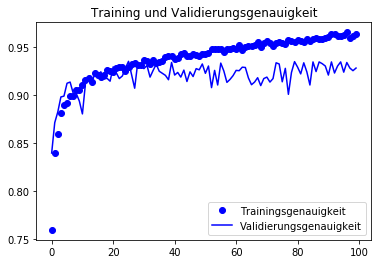

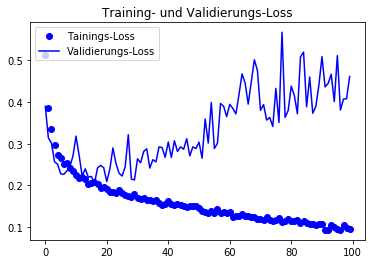

In [0]:
import matplotlib.pyplot as plt
acc = history_mob.history['acc']
val_acc = history_mob.history['val_acc']
loss = history_mob.history['loss']
val_loss = history_mob.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Training und Validierungsgenauigkeit')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Tainings-Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs-Loss')
plt.title("Training- und Validierungs-Loss")
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, model_mob.predict_classes(X_train)))
print(confusion_matrix(Y_test, model_mob.predict_classes(X_test)))

[[ 186 6918]
 [  43 2726]]
[[  70 2301]
 [  15  906]]


In [11]:
#Ab hier wurden die Runtimes resetet und die Modelle neu trainiert anhand der Erkenntnisse aus den vorherigen Grafiken
history_vgg = model_vgg.fit_generator(
      train_generator,
      epochs=17,
      validation_data=validation_generator,
      class_weight = class_weights)

Epoch 1/17
66/66 [==============================] - 43s 656ms/step - loss: 0.5642 - acc: 0.7337 - val_loss: 0.2786 - val_acc: 0.8891
Epoch 2/17
66/66 [==============================] - 27s 403ms/step - loss: 0.3182 - acc: 0.8711 - val_loss: 0.2309 - val_acc: 0.9007
Epoch 3/17
66/66 [==============================] - 27s 403ms/step - loss: 0.2601 - acc: 0.8999 - val_loss: 0.1943 - val_acc: 0.9228
Epoch 4/17
66/66 [==============================] - 27s 405ms/step - loss: 0.2437 - acc: 0.9057 - val_loss: 0.2456 - val_acc: 0.9016
Epoch 5/17
66/66 [==============================] - 27s 405ms/step - loss: 0.2300 - acc: 0.9086 - val_loss: 0.1860 - val_acc: 0.9219
Epoch 6/17
66/66 [==============================] - 27s 404ms/step - loss: 0.2132 - acc: 0.9187 - val_loss: 0.1791 - val_acc: 0.9271
Epoch 7/17
66/66 [==============================] - 27s 404ms/step - loss: 0.2091 - acc: 0.9190 - val_loss: 0.1704 - val_acc: 0.9326
Epoch 8/17
66/66 [==============================] - 27s 405ms/step - 

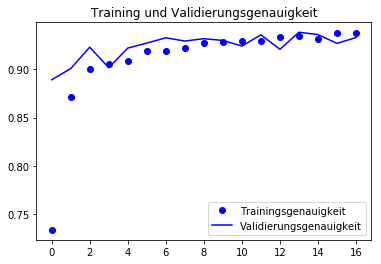

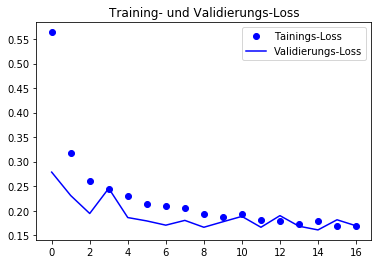

In [14]:
import matplotlib.pyplot as plt
acc = history_vgg.history['acc']
val_acc = history_vgg.history['val_acc']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Training und Validierungsgenauigkeit')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Tainings-Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs-Loss')
plt.title("Training- und Validierungs-Loss")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, model_vgg.predict_classes(X_train)))
print(confusion_matrix(Y_test, model_vgg.predict_classes(X_test)))

[[6485  582]
 [ 151 2655]]
[[2193  215]
 [  68  816]]


In [14]:
history_res = model_res.fit_generator(
      train_generator,
      epochs=4,
      validation_data=validation_generator,
      class_weight = class_weights)

Epoch 1/4
66/66 [==============================] - 54s 825ms/step - loss: 0.4397 - acc: 0.8023 - val_loss: 0.4162 - val_acc: 0.8694
Epoch 2/4
66/66 [==============================] - 34s 521ms/step - loss: 0.2977 - acc: 0.8836 - val_loss: 1.5087 - val_acc: 0.8214
Epoch 3/4
66/66 [==============================] - 34s 523ms/step - loss: 0.2481 - acc: 0.9023 - val_loss: 1.0543 - val_acc: 0.8821
Epoch 4/4
66/66 [==============================] - 34s 520ms/step - loss: 0.2319 - acc: 0.9108 - val_loss: 2.1688 - val_acc: 0.8329


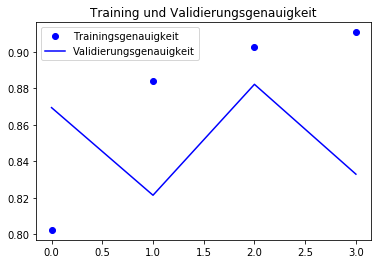

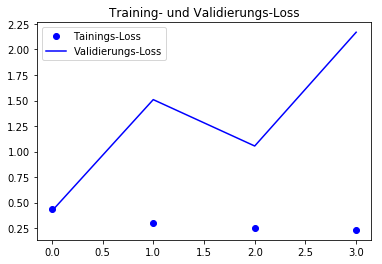

In [15]:
import matplotlib.pyplot as plt
acc = history_res.history['acc']
val_acc = history_res.history['val_acc']
loss = history_res.history['loss']
val_loss = history_res.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Training und Validierungsgenauigkeit')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Tainings-Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs-Loss')
plt.title("Training- und Validierungs-Loss")
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, model_res.predict_classes(X_train)))
print(confusion_matrix(Y_test, model_res.predict_classes(X_test)))

[[7099    0]
 [2774    0]]
[[2376    0]
 [ 916    0]]


In [17]:
history_mob = model_mob.fit_generator(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      class_weight = class_weights)

Epoch 1/15
66/66 [==============================] - 27s 406ms/step - loss: 0.5004 - acc: 0.7632 - val_loss: 0.3718 - val_acc: 0.8451
Epoch 2/15
66/66 [==============================] - 16s 238ms/step - loss: 0.3520 - acc: 0.8499 - val_loss: 0.3144 - val_acc: 0.8779
Epoch 3/15
66/66 [==============================] - 17s 256ms/step - loss: 0.3088 - acc: 0.8698 - val_loss: 0.3034 - val_acc: 0.8949
Epoch 4/15
66/66 [==============================] - 17s 253ms/step - loss: 0.2866 - acc: 0.8879 - val_loss: 0.2912 - val_acc: 0.8852
Epoch 5/15
66/66 [==============================] - 17s 256ms/step - loss: 0.2726 - acc: 0.8884 - val_loss: 0.2746 - val_acc: 0.8985
Epoch 6/15
66/66 [==============================] - 17s 253ms/step - loss: 0.2475 - acc: 0.9027 - val_loss: 0.2607 - val_acc: 0.9022
Epoch 7/15
66/66 [==============================] - 17s 254ms/step - loss: 0.2374 - acc: 0.9069 - val_loss: 0.2637 - val_acc: 0.9061
Epoch 8/15
66/66 [==============================] - 17s 254ms/step - 

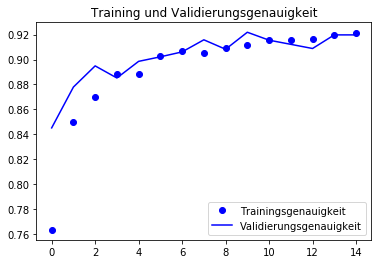

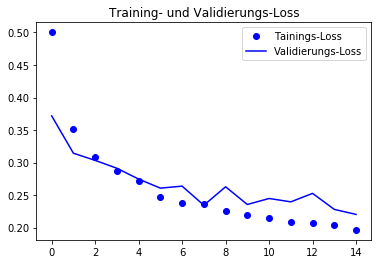

In [18]:
import matplotlib.pyplot as plt
acc = history_mob.history['acc']
val_acc = history_mob.history['val_acc']
loss = history_mob.history['loss']
val_loss = history_mob.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Trainingsgenauigkeit')
plt.plot(epochs, val_acc, 'b', label='Validierungsgenauigkeit')
plt.title('Training und Validierungsgenauigkeit')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Tainings-Loss')
plt.plot(epochs, val_loss, 'b', label='Validierungs-Loss')
plt.title("Training- und Validierungs-Loss")
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_train, model_mob.predict_classes(X_train)))
print(confusion_matrix(Y_test, model_mob.predict_classes(X_test)))

[[7099    0]
 [2772    2]]
[[2376    0]
 [ 916    0]]


In [0]:
#Nur aus dem VGG-Modell kam ein brauchbares Resultat. Die andere Netze sind nicht zu gebrauchen.

model_vgg.save("model_vgg.h5")
#model_res.save("model_res.h5")
#model_mob.save("model_mob.h5")